# Teoría de la Información y la Codificación
## Tarea: Búsqueda Binaria Probabilística


# Autor: 

Rellene la siguiente información:

 - Estudiante (nombre y apellidos): Jorge Gangoso Klöck
 - DNI/NIE/Pasaporte: 49398653N
 - Grupo: 1
 - Curso académico: 2021-2022



__Yo, como estudiante de la asignatura, aseguro que la elaboración de estos ejercicios ha sido realizada de forma individual, sin incurrir en copias parciales o totales de código fuente o documentación, y acepto las repercusiones que conllevaría si esto no fuese así.__


# Respuestas a las cuestiones teóricas:

### Noción intuitiva de Entropía 

El concepto intuitivo de Entropía nos presenta la idea de que para conocer la cantidad media de preguntas que necesitaríamos para descifrar cualquier mensaje enviado a nosotros sólo debemos crear un árbol en el que vayamos dividiendo las ramas de forma que la probabilidad acumulada de cada rama sea equiprobable, y, una vez terminado, observar la cantidad de ramificaciones que necesitamos para llegar a un determinado mensaje. 
Si llamamos a ese número de preguntas para descifrar el mensaje i-ésimo $n_{i}$, la cantidad de mensajes promedio no será más que la suma de estas preguntas ponderadas con la probabilidad de recibir cada mensaje ($P(S_{i})$) . Este concepto al que llamamos esperanza de información se formaliza de la siguiente manera:

$\sum_{i=1}^{n}P(S_{i})*n_{i}$
    


En la definición formal de Entropía utilizamos el logaritmo (con signo invertido) de la probabilidad de un mensaje. Esta operación nos permitirá saber cuántas preguntas necesitaríamos como mínimo para descifrar dicho mensaje sin necesidad de construir un árbol de preguntas que incorpore todos los posibles mensajes.

Podemos comprobar la veracidad de esta afirmación sencillamente como prosigue:
1. $log_{2}(0.5) = 1$
2. $log_{2}(0.25) = 2$
3. $log_{2}(0.125) = 3$

 ![img_not_found](imagenes/arbol2.png "Árbol de Preguntas")

Es facil ver que en un árbol construido mediante el concepto intuitivo de Entropía estudiado, los únicos mensajes que pueden descifrarse con 1 pregunta son aquellos con $P(x) >= 0.5$. En cada nivel el valor de n se corresponde con el valor del logaritmo calculado anteriormente. Es importante notar que hablamos de un valor medio, por ello los logaritmos pueden no resultar números enteros a pesar de que el número de preguntas a realizar sí debe serlo.

### La entropía y la búsqueda binaria

Como acabamos de observar, el proceso para minimizar el número de preguntas a realizar conllevaba la realización de un árbol separado por ramas equiprobables. Por tanto, siguiendo el mismo razonamiento, para minimizar el número de iteraciones a realizar hasta encontrar un elemento (podemos ver la directa relación entre hacer una pregunta y realizar una iteración) deberemos separar la lista de elementos de forma equiprobable también.

En la búsqueda binaria original, puesto que no conocemos las probabilidades de que el elemento a encontrar se encuentre en una u otra posición, lo más razonable es asumir que todas las posiciones son equiprobables para nuestro objetivo, y por ello se procede separando el vector en subvectores de igual longitud.

### Búsqueda binaria probabilística

En contraste con el caso inicial en que no conocemos la probabilidad de que lo que buscamos se encuentre en cada posición, si conocemos esas probabilidades entramos en conflicto con la entropía. Separar los vectores en subvectores de igual longitud ya no nos garantiza realizar el número mínimo de preguntas promedio.
Sin embargo, hay una forma sencilla de recuperar esa optimalidad. En lugar de separar los vectores en subvectores de igual longitud los separaremos en subvectores de igual (o lo más próximo posible) probabilidad. De esta manera el concepto de Entropía nos garantiza que seguiremos haciendo la cantidad mínima de preguntas en promedio, es decir, de iteraciones en la búsqueda.

Para realizar dicho algoritmo sólo necesitaremos una función que nos calcule el punto medio en el que debemos dividir un vector para obtener dos vectores lo más equiprobables posibles. El resto del algoritmo funciona siguiendo el mismo procedimiento.

### Resultados

Se han llevado a cabo experimentos con variaciones en los siguientes parámetros:

    1. Tamaño del vector: Se ha observado tamaño del vector afecta proporcionalmente a la diferencia de iteraciones medias entre los algoritmos. No obstante, debido al factor aleatorio de la posición del elemento, en vectores muy grandes, la penalización que recibe el algoritmo probabilístico es mucha más cuando el elemento se encuentra en una posición poco probable.
    
    2. Sesgo: El sesgo determina lo uniforme que se encuentra la distribución de probabilidad. Se ha verificado experimentalmente la hipótesis que afirma que cuanto más sesgada se encuentra la distribución, mayor información se transmite, menos incertidumbre hay, y, en consecuencia, menor cantidad de preguntas promedio (Entropía) necesitaremos.
    Si las probabilidades son equiprobables ambos algoritmos funcionan de exactamente la misma manera.
    
| Sesgo | BB mean | BBPmean | BB min/max | BBP min/max 
| --- | --- | --- | --- | --- |
| No | 6.0892 | 6.0892 | 1/8 | 1/8 |
| Lineal | 6.0676 | 5.8402 | 1/8 | 1/12 |
| Cuadrático | 6.1346 | 5.4929 | 1/8 | 1/13 |
| Cúbico | 6.1301 | 5.2219 | 1/8 | 1/18 |
| Acentuado | 6.4015 | 2.8925 | 4/8 | 1/4 |


Observamos también como las iteraciones promedio de la búsqueda binaria  clásica aumenta. Esto en realidad es símplemente un efecto colateral de la forma en que se han sesgado las probabilidades, acercando cada vez más el algoritmo BB a su peor caso (que el elemento se encuentre en una de las esquinas), si el sesgo fuera centrado en la mitad del vector las iteraciones medias bajarían.
    
Si nos paramos a observar los mínimos y máximos vemos como el mínimo siempre es al menos 1 ya que al menos se debe hacer la primera comprobación para ver si el número que buscamos está justo en el centro (En el caso acentuado la probabilidad de un elemento de estar en cualquier cuadrante a menos de 4 comprobaciones es de 0).
    
Por tanto nos interesaremos en los máximos. Vemos como el máximo de iteraciones a realizar tiende a estar a favor de la Búsqueda Binaria clásica. La explicación es la siguiente: En un vector de $n$ elementos necesitaremos dividir mediante un árbol binario $log_{2}(n)+1$ iteraciones (Si no contamos el primer paso como iteración serían $log_{2}(n)$). Esto se demuestra tan sencillo como que para decodificar cualquier número entre 0 y n necesitamos pasar por $2^{n-1}$ ramas de un árbol binario.
    
Sin embargo, La versión probabilística carece de esta cota al no dividir el vector siempre en partes de igual cantidad de elementos. De esta manera, es razonable que si el elemento a buscar se encuentra en una posición de baja probabilidad, el algoritmo probabilístico tarde más iteraciones en encontrarlo. No obstante, podemos comprobar por los histogramas incluídos al final del documento que si bien la cantidad de iteraciones puede tomar valores mayores a $log_{2}(n)+1$, la densidad se concentra alrededor de cantidades menores, que es lo que provoca una cantidad media de iteraciones menor. Es el mismo caso que cuando se plantea utilizar codificaciones que asignen mayor cantidad de bits a mensajes menos probables superando la cota binaria.
    






In [822]:
#imports
import numpy as np
import matplotlib.pyplot as plt


In [823]:

# El tamaño del vector donde se buscará
N= 128

# El elemento a buscar
x= 100

# Número de ejecuciones (experimentos) a realizar. Establezca un número alto (>1000).
NumEjecuciones= 10000 # Ejemplo de número de experimentos

#Tipo de sesgo para comparar los algoritmos. Recomendado: Cúbico/Acentuado
sesgo = "cubico"


In [824]:

# Función auxiliar para generar un array numérico de tamaño N con un elemento x en una de sus
# componentes. La componente donde se asignará x estará dada por el vector de probabilidades
# de entrada P, también de tamaño N. P[i] indica la probabilidad de que x se asigne
# al vector devuelto, V, en la componente V[i]
# Se asegura que el vector devuelto está ordenado de menor a mayor.
def VectorComponenteAleatoria(x, P):
    V= np.zeros(len(P))
    componente= np.random.choice(len(P), p=P)
    V[componente]= x
    if (componente>0):
        for i in range(componente):
            V[i]= i-x
    if (componente<len(P)):
        for i in range(componente+1, len(P)):
            V[i]= x+i
    return V



In [825]:

# Definición de función que implementa el algoritmo de búsqueda binaria clásico ITERATIVO
# Debe tener como entrada:
#  - Un vector v de tamaño N donde se buscará un elemento.
#  - El elemento x a buscar en v
# Debe devolver:
#  - El índice donde se encontró el elemento a buscar x (-1 en caso de no encontrarse)
#  - El número de iteraciones del bucle principal realizado antes de salir de la función
def BBclasica(v, x):
    ini = 0
    fin = v.size-1
    iteraciones = 0
    while (ini <= fin):
        iteraciones += 1
        centro = int((ini+fin)/2)
        if (v[centro] == x):
            return centro, iteraciones
        if (v[centro] > x):
            fin = centro-1
        else:
            ini = centro+1
    return -1, iteraciones

In [826]:

# Definición de función que implementa el algoritmo de búsqueda binaria probabilístico ITERATIVO
# Debe tener como entrada:
#  - Un vector v de tamaño N donde se buscará un elemento.
#  - El elemento x a buscar en v
#  - Un vector P de tamaño N con las probabilidades P[i] de que el elemento x se encuentre en v[i]
# Debe devolver:
#  - El índice donde se encontró el elemento a buscar x (-1 en caso de no encontrarse)
#  - El número de iteraciones del bucle principal realizado antes de salir de la función

def calculaCentroP (P):
    p_acumulada = 0
    contador = 0
    p_media = sum(P)/2
    while (p_acumulada < p_media):
        p_acumulada += P[contador]
        contador += 1
    if(contador > 1):
        return contador-1
    return 0

def BBP(v, x, P):
    ini = 0
    fin = v.size -1
    iteraciones = 0
    while (ini <= fin):
        iteraciones += 1
        centro = ini + calculaCentroP(P[ini:fin+1])
        if (v[centro] == x):
            return centro, iteraciones
        if (v[centro] > x):
            fin = centro-1
        else:
            ini = centro+1
    return -1, iteraciones

In [827]:


# Iteraciones realizadas por la búsqueda binaria en cada ejecución. Inicialmente vacío
IterBB= []

# Iteraciones realizadas por la búsqueda binaria probabilística en cada ejecución. Inicialmente vacío
IterBBP= []

# Establezca un vector de probabilidades NO EQUIPROBABLES de tamaño N
# P= ...

p = np.arange(N)
p = p.astype(float)


if (sesgo == "lineal"):
    p = p/sum(p)
elif (sesgo == "cuadratico"):
    p = p**2
    p = p/sum(p)
elif (sesgo == "cubico"):
    p = p**3
    p = p/sum(p)    
elif (sesgo == "acentuado"):
    p[0:N-10] = 0
    p[N-10:N] = 0.1
elif (sesgo == "no"):
    p[::] = 1/p.size
    

# Ejecutar varias ejecuciones
for i in range(NumEjecuciones):
    # Generar un vector V de tamaño N con la función VectorComponenteAleatoria
    v = VectorComponenteAleatoria(x, p)
    
    # Ejecutar búsqueda binaria clásica
    posicion, iteraciones = BBclasica(v, x)
    if(posicion < 0):
        print("ERROR - número no encontrado")
    # Añadir el número de iteraciones resultante del algoritmo a la lista IterBB
    IterBB.append(np.uint8(iteraciones))
    # Ejecutar búsqueda binaria probabilística
    posicion, iteraciones = BBP(v, x, p)
    if(posicion < 0):
        print("ERROR - número no encontrado")
    # Añadir el número de iteraciones resultante del algoritmo a la lista IterBBP
    IterBBP.append(np.uint8(iteraciones))

# Realizar el análisis requerido 1+
print("Sesgo: ", sesgo)
print("Media BB: ", np.mean(IterBB))
print("Mín/Max: ", min(IterBB), " / ", max(IterBB))
print("Media BBP: ", np.mean(IterBBP))
print("Mín/Max: ", min(IterBBP), " / ", max(IterBBP))

Sesgo:  cubico
Media BB:  6.1356
Mín/Max:  1  /  8
Media BBP:  5.2148
Mín/Max:  1  /  15


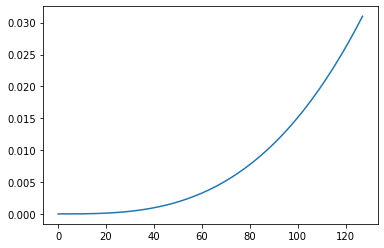

In [828]:
plt.plot(np.arange(N), p)
plt.show()

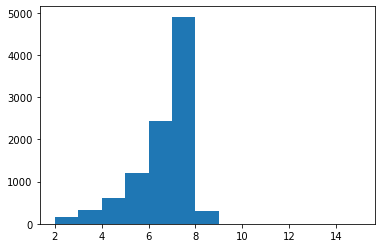

In [829]:
plt.hist(IterBB, bins=np.arange(1,np.maximum(max(IterBB),max(IterBBP)))+1)
plt.show()

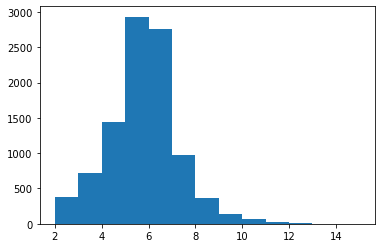

In [830]:
plt.hist(IterBBP, bins=np.arange(1,np.maximum(max(IterBB),max(IterBBP)))+1)
plt.show()